In [1]:
#Importing library
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
#checking the shape
df_train.shape,df_test.shape

((1460, 81), (1459, 80))

In [60]:
#concatinating the Training and Test  by rows
df = pd.concat([df_train,df_test],axis = 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [5]:
df.shape

(2919, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [7]:
#dealing with missing values

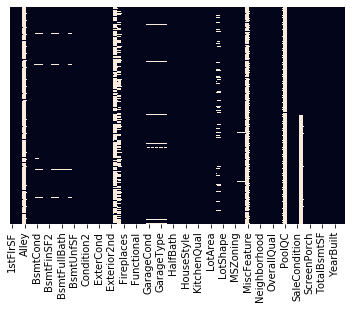

In [61]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [8]:
df["Alley"].isna().sum()

2721

In [9]:
df.drop(["Alley"],axis = 1,inplace = True)

In [10]:
df["Fence"].isna().sum()

2348

In [11]:
df.drop(["Fence"],axis = 1,inplace = True)

In [12]:
df["MiscFeature"].isna().sum()

2814

In [13]:
df.drop(["MiscFeature"],axis = 1,inplace = True)

In [14]:
df["PoolQC"].isna().sum()

2909

In [15]:
df.drop(["PoolQC"],axis = 1,inplace = True)

In [16]:
df.drop(['SalePrice'],axis = 1,inplace = True)

In [17]:
df.drop(['Id'],axis = 1,inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      29

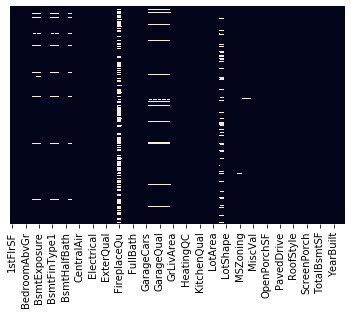

In [19]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [20]:
df['FireplaceQu'].isnull().sum()

1420

In [21]:
df['FireplaceQu']

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1454    NaN
1455    NaN
1456     TA
1457    NaN
1458     TA
Name: FireplaceQu, Length: 2919, dtype: object

In [22]:
#selecting all the numberic column
list_num_col = list(df.select_dtypes(exclude = 'object').columns)

In [23]:
#selecting all the object column
list_obj_col = list(df.select_dtypes(include = 'object').columns)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      29

In [25]:
df['OverallCond'].isnull().sum()

0

In [26]:
df['OverallQual'].isnull().sum()

0

In [27]:
#This is the function which deals with all fill the categorical value, and with numberic value
def fillna_all(dataframe):
    for col in list_obj_col:
        df[col].fillna(value = df[col].mode()[0],inplace = True)
    for col in list_num_col:
        df[col].fillna(value = df[col].mean(),inplace = True)
    

In [28]:
#implementing the fucntion
fillna_all(df)

In [29]:
#checking again
df.isna().sum()

1stFlrSF        0
2ndFlrSF        0
3SsnPorch       0
BedroomAbvGr    0
BldgType        0
               ..
Utilities       0
WoodDeckSF      0
YearBuilt       0
YearRemodAdd    0
YrSold          0
Length: 75, dtype: int64

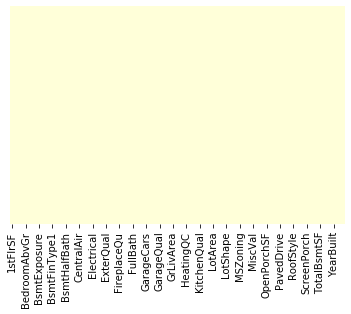

In [30]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap = 'YlGnBu')

In [31]:
df[list_obj_col]

,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,...,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,...,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
1,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,...,RL,None,Veenker,Y,CompShg,Gable,Normal,WD,Pave,AllPub
2,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,...,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
3,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,...,RL,None,Crawfor,Y,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,...,RL,BrkFace,NoRidge,Y,CompShg,Gable,Normal,WD,Pave,AllPub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,Twnhs,TA,No,Unf,Unf,TA,Y,Norm,Norm,SBrkr,...,RM,None,MeadowV,Y,CompShg,Gable,Normal,WD,Pave,AllPub
1455,TwnhsE,TA,No,Rec,Unf,TA,Y,Norm,Norm,SBrkr,...,RM,None,MeadowV,Y,CompShg,Gable,Abnorml,WD,Pave,AllPub
1456,1Fam,TA,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,...,RL,None,Mitchel,Y,CompShg,Gable,Abnorml,WD,Pave,AllPub
1457,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,...,RL,None,Mitchel,Y,CompShg,Gable,Normal,WD,Pave,AllPub


In [32]:
len(list_obj_col)

39

In [33]:
df.dropna(inplace=True)

In [34]:
#doing the oneHotEncoding for object column
dummy = pd.get_dummies(df[list_obj_col],drop_first = True)

In [35]:
dummy.shape

(2919, 200)

In [36]:
#concating the the dummy variable 
df = pd.concat([df,dummy],axis = 1)

In [37]:
df.shape

(2919, 275)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 275 entries, 1stFlrSF to Utilities_NoSeWa
dtypes: float64(11), int64(25), object(39), uint8(200)
memory usage: 2.2+ MB


In [39]:
df.loc[:,~df.columns.duplicated()]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,0,0,0,0,0,0,0,1,1,0
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,0,0,0,0,0,0,0,1,1,0
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,0,0,0,0,0,0,0,1,1,0
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,0,0,0,0,0,0,0,1,1,0
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,Twnhs,TA,No,0.0,0.0,Unf,...,0,0,0,0,0,0,0,1,1,0
1455,546,546,0,3,TwnhsE,TA,No,252.0,0.0,Rec,...,0,0,0,0,0,0,0,1,1,0
1456,1224,0,0,4,1Fam,TA,No,1224.0,0.0,ALQ,...,0,0,0,0,0,0,0,1,1,0
1457,970,0,0,3,1Fam,TA,Av,337.0,0.0,GLQ,...,0,0,0,0,0,0,0,1,1,0


In [40]:
df.shape

(2919, 275)

In [41]:
#droping the column which has used for creating the dummy variable
df.drop(df[list_obj_col],axis = 1,inplace = True)

In [42]:
df.shape

(2919, 236)

In [43]:
#removing the dublicate
df.loc[:,~df.columns.duplicated()]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,0,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,0,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,0,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,0,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,0.0,0.0,0.0,0.0,546.0,0,...,0,0,0,0,0,0,0,1,1,0
1455,546,546,0,3,252.0,0.0,0.0,0.0,294.0,0,...,0,0,0,0,0,0,0,1,1,0
1456,1224,0,0,4,1224.0,0.0,1.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,1,0
1457,970,0,0,3,337.0,0.0,0.0,1.0,575.0,0,...,0,0,0,0,0,0,0,1,1,0


In [44]:
df.shape

(2919, 236)

In [45]:
#Spliting into the traing and testing
x_train = df.iloc[:1460,:]
x_test = df.iloc[1460:,:]

In [46]:
#seting the dependent variable
y_train = df_train['SalePrice']

In [48]:
y_train.shape

(1460,)

In [49]:
x_train.shape

(1460, 236)

In [50]:
import xgboost
regressor=xgboost.XGBRegressor()
/*hyperparameter optimization is the problem of choosing a set of optimal hyperparameters for a learning algorithm. 
A hyperparameter is a parameter whose value is used to control the learning process*/

##Hyper Parameter Optimization
n_estimators = [100,500,900,1100,1500]
max_depth = [2,3,5,10,15]
booster = ['gbtree','gblinear']
learning_rate = [0.05,0.1,0.15,0.20]
min_child_weight =[1,2,3,4]
base_score=[0.25,0.5,0.75,1]


#Defining the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
}

C:\ProgramData\Anaconda3\lib\site-packages\distributed\utils.py:133: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10051] A socket operation was attempted to an unreachable network
  RuntimeWarning,


In [51]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [52]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   46.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 13.4min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 18.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_con...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                              

In [53]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [54]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [55]:
regressor.fit(x_train,y_train)

[12:07:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:07:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:07:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, silent=True, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
#predicting the sale price
y_pred = regressor.predict(x_test)

In [57]:
#converting it into the dataframe
pred = pd.DataFrame(y_pred)

In [58]:
#Exporting the dataframe
sub = pd.read_csv('sample_submission.csv')
new = pd.concat([sub['Id'],pred],axis = 1)
new.columns = ['Id','SalePrice']
new.to_csv('sample_submission1.csv',index = False)